## Khai báo thư viện

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

from PIL import Image
import cv2
from zipfile import ZipFile
import os

## Giải nén file dữ liệu

In [3]:
file_train = 'D:\File Dowload\ziptrain.zip'
file_test = 'D:\File Dowload\ziptest1.zip'

with ZipFile(file_train, 'r') as zip:
    zip.extractall('/ziptrain')
    print('Train Extract Done!') 
    
with ZipFile(file_test,'r') as zip:
    zip.extractall('/ziptest1')
    print('Test Extract Done!')

<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:2: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:2: SyntaxWarning: invalid escape sequence '\F'
C:\Users\AD\AppData\Local\Temp\ipykernel_4224\4201985887.py:1: SyntaxWarning: invalid escape sequence '\F'
  file_train = 'D:\File Dowload\ziptrain.zip'
C:\Users\AD\AppData\Local\Temp\ipykernel_4224\4201985887.py:2: SyntaxWarning: invalid escape sequence '\F'
  file_test = 'D:\File Dowload\ziptest1.zip'


Train Extract Done!
Test Extract Done!


### Số lượng ảnh

In [4]:
print('Train Data ',len(os.listdir('D:\ziptrain\ziptrain')))
print('Test Data ',len(os.listdir('D:\ziptest1\ziptest1')))

Train Data  25000
Test Data  12500


<>:1: SyntaxWarning: invalid escape sequence '\z'
<>:2: SyntaxWarning: invalid escape sequence '\z'
<>:1: SyntaxWarning: invalid escape sequence '\z'
<>:2: SyntaxWarning: invalid escape sequence '\z'
C:\Users\AD\AppData\Local\Temp\ipykernel_4224\4032587127.py:1: SyntaxWarning: invalid escape sequence '\z'
  print('Train Data ',len(os.listdir('D:\ziptrain\ziptrain')))
C:\Users\AD\AppData\Local\Temp\ipykernel_4224\4032587127.py:2: SyntaxWarning: invalid escape sequence '\z'
  print('Test Data ',len(os.listdir('D:\ziptest1\ziptest1')))


### Mở random một ảnh huấn luyện

<>:1: SyntaxWarning: invalid escape sequence '\z'
<>:2: SyntaxWarning: invalid escape sequence '\z'
<>:5: SyntaxWarning: invalid escape sequence '\z'
<>:1: SyntaxWarning: invalid escape sequence '\z'
<>:2: SyntaxWarning: invalid escape sequence '\z'
<>:5: SyntaxWarning: invalid escape sequence '\z'
C:\Users\AD\AppData\Local\Temp\ipykernel_4224\3692869697.py:1: SyntaxWarning: invalid escape sequence '\z'
  rand_pic = np.random.randint(0,len(os.listdir('D:\ziptrain\ziptrain')))
C:\Users\AD\AppData\Local\Temp\ipykernel_4224\3692869697.py:2: SyntaxWarning: invalid escape sequence '\z'
  dc_pic = os.listdir('D:\ziptrain\ziptrain')[rand_pic]
C:\Users\AD\AppData\Local\Temp\ipykernel_4224\3692869697.py:5: SyntaxWarning: invalid escape sequence '\z'
  dc_load = Image.open('D:\ziptrain\ziptrain\\' + dc_pic)


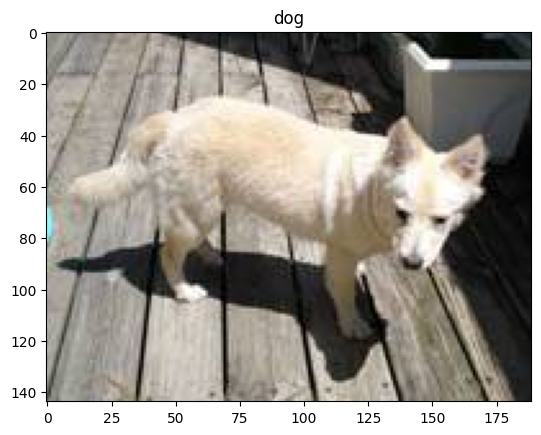

In [5]:
rand_pic = np.random.randint(0,len(os.listdir('D:\ziptrain\ziptrain')))
dc_pic = os.listdir('D:\ziptrain\ziptrain')[rand_pic]
dc_load = Image.open('D:\ziptrain\ziptrain\\' + dc_pic)
category = dc_pic.split(".")[0]
plt.title(category)
img_plot = plt.imshow(dc_load)

## Tạo data huấn luyện mô hình

In [6]:
train_path = 'D:\ziptrain\ziptrain'

#Tạo danh sách X_train lưu trữ hình ảnh, y_train lưu nhãn
X_train = []
y_train = []

#Chuyển đổi nhãn "dog" thành 1, nhãn còn lại thành 0
convert = lambda category : int(category == 'dog')

#Hàm tạo dữ liệu huấn luyện mô hình
def create_train_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_train.append(new_img_array)
        y_train.append(category)
        
create_train_data(train_path)

#Chuẩn hóa dữ liệu ảnh
X_train = np.array(X_train).reshape(-1, 80,80,1)
y_train = np.array(y_train)
X_train = X_train/255.0

<>:1: SyntaxWarning: invalid escape sequence '\z'
<>:1: SyntaxWarning: invalid escape sequence '\z'
C:\Users\AD\AppData\Local\Temp\ipykernel_4224\625198634.py:1: SyntaxWarning: invalid escape sequence '\z'
  train_path = 'D:\ziptrain\ziptrain'


In [7]:
test_path = 'D:\ziptest1\ziptest1'

X_test = []
test_id = []

def create_test_data(path):
    for p in os.listdir(path):
        test_id.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)

create_test_data(test_path)

X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

<>:1: SyntaxWarning: invalid escape sequence '\z'
<>:1: SyntaxWarning: invalid escape sequence '\z'
C:\Users\AD\AppData\Local\Temp\ipykernel_4224\1739168847.py:1: SyntaxWarning: invalid escape sequence '\z'
  test_path = 'D:\ziptest1\ziptest1'


## Tạo mô hình 

In [8]:
model = Sequential()

model.add(Conv2D(16,(3,3), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


c:\Users\AD\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 78, 78, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 39, 39, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 37, 37, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 688,001 (2.62 MB)

 Trainable params: 688,001 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

## Huấn luyện mô hình

In [11]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 100, validation_split=0.3)

Epoch 1/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 110ms/step - accuracy: 0.7023 - loss: 0.6001 - val_accuracy: 0.1329 - val_loss: 1.2636
Epoch 2/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 17s 99ms/step - accuracy: 0.7540 - loss: 0.5221 - val_accuracy: 0.3545 - val_loss: 1.0220
Epoch 3/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 18s 103ms/step - accuracy: 0.7761 - loss: 0.4707 - val_accuracy: 0.6243 - val_loss: 0.7042
Epoch 4/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - accuracy: 0.8100 - loss: 0.4172 - val_accuracy: 0.5696 - val_loss: 0.8118
Epoch 5/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 19s 109ms/step - accuracy: 0.8273 - loss: 0.3777 - val_accuracy: 0.6288 - val_loss: 0.7490
Epoch 6/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.8475 - loss: 0.3393 - val_accuracy: 0.6577 - val_loss: 0.6857
Epoch 7/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.8614 - loss: 0.3163 - val_accuracy: 0.5748 - val_loss: 0.8493
Epoch 8/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.8782 - loss: 0.

## Đánh giá mô hình

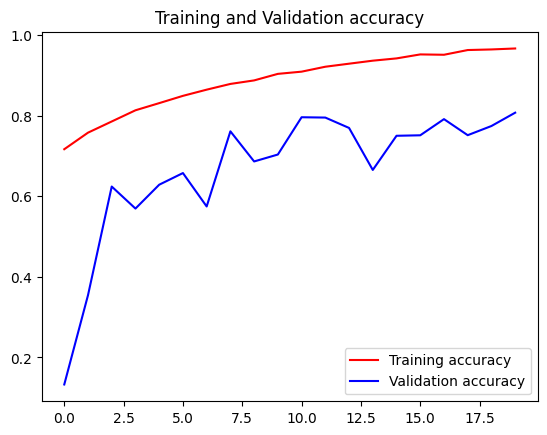

<Figure size 640x480 with 0 Axes>

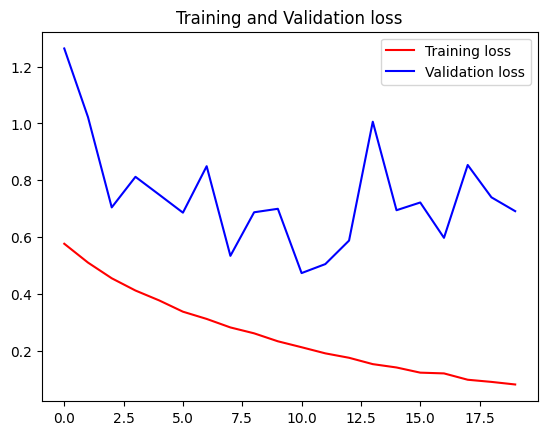

<Figure size 640x480 with 0 Axes>

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

acc = history.history['loss']
val_acc = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

## Dự đoán hình ảnh

In [13]:
predictions = model.predict(X_test)
predicted_val = [int(round(p[0])) for p in predictions]

391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


In [14]:
submission_df = pd.DataFrame({'id':test_id, 'label':predicted_val})
submission_df.to_csv("submission.csv", index=False)

<>:6: SyntaxWarning: invalid escape sequence '\z'
<>:6: SyntaxWarning: invalid escape sequence '\z'
C:\Users\AD\AppData\Local\Temp\ipykernel_4224\1567298901.py:6: SyntaxWarning: invalid escape sequence '\z'
  img = plt.imread("D:\ziptest1\ziptest1\\" + filename + ".jpg")


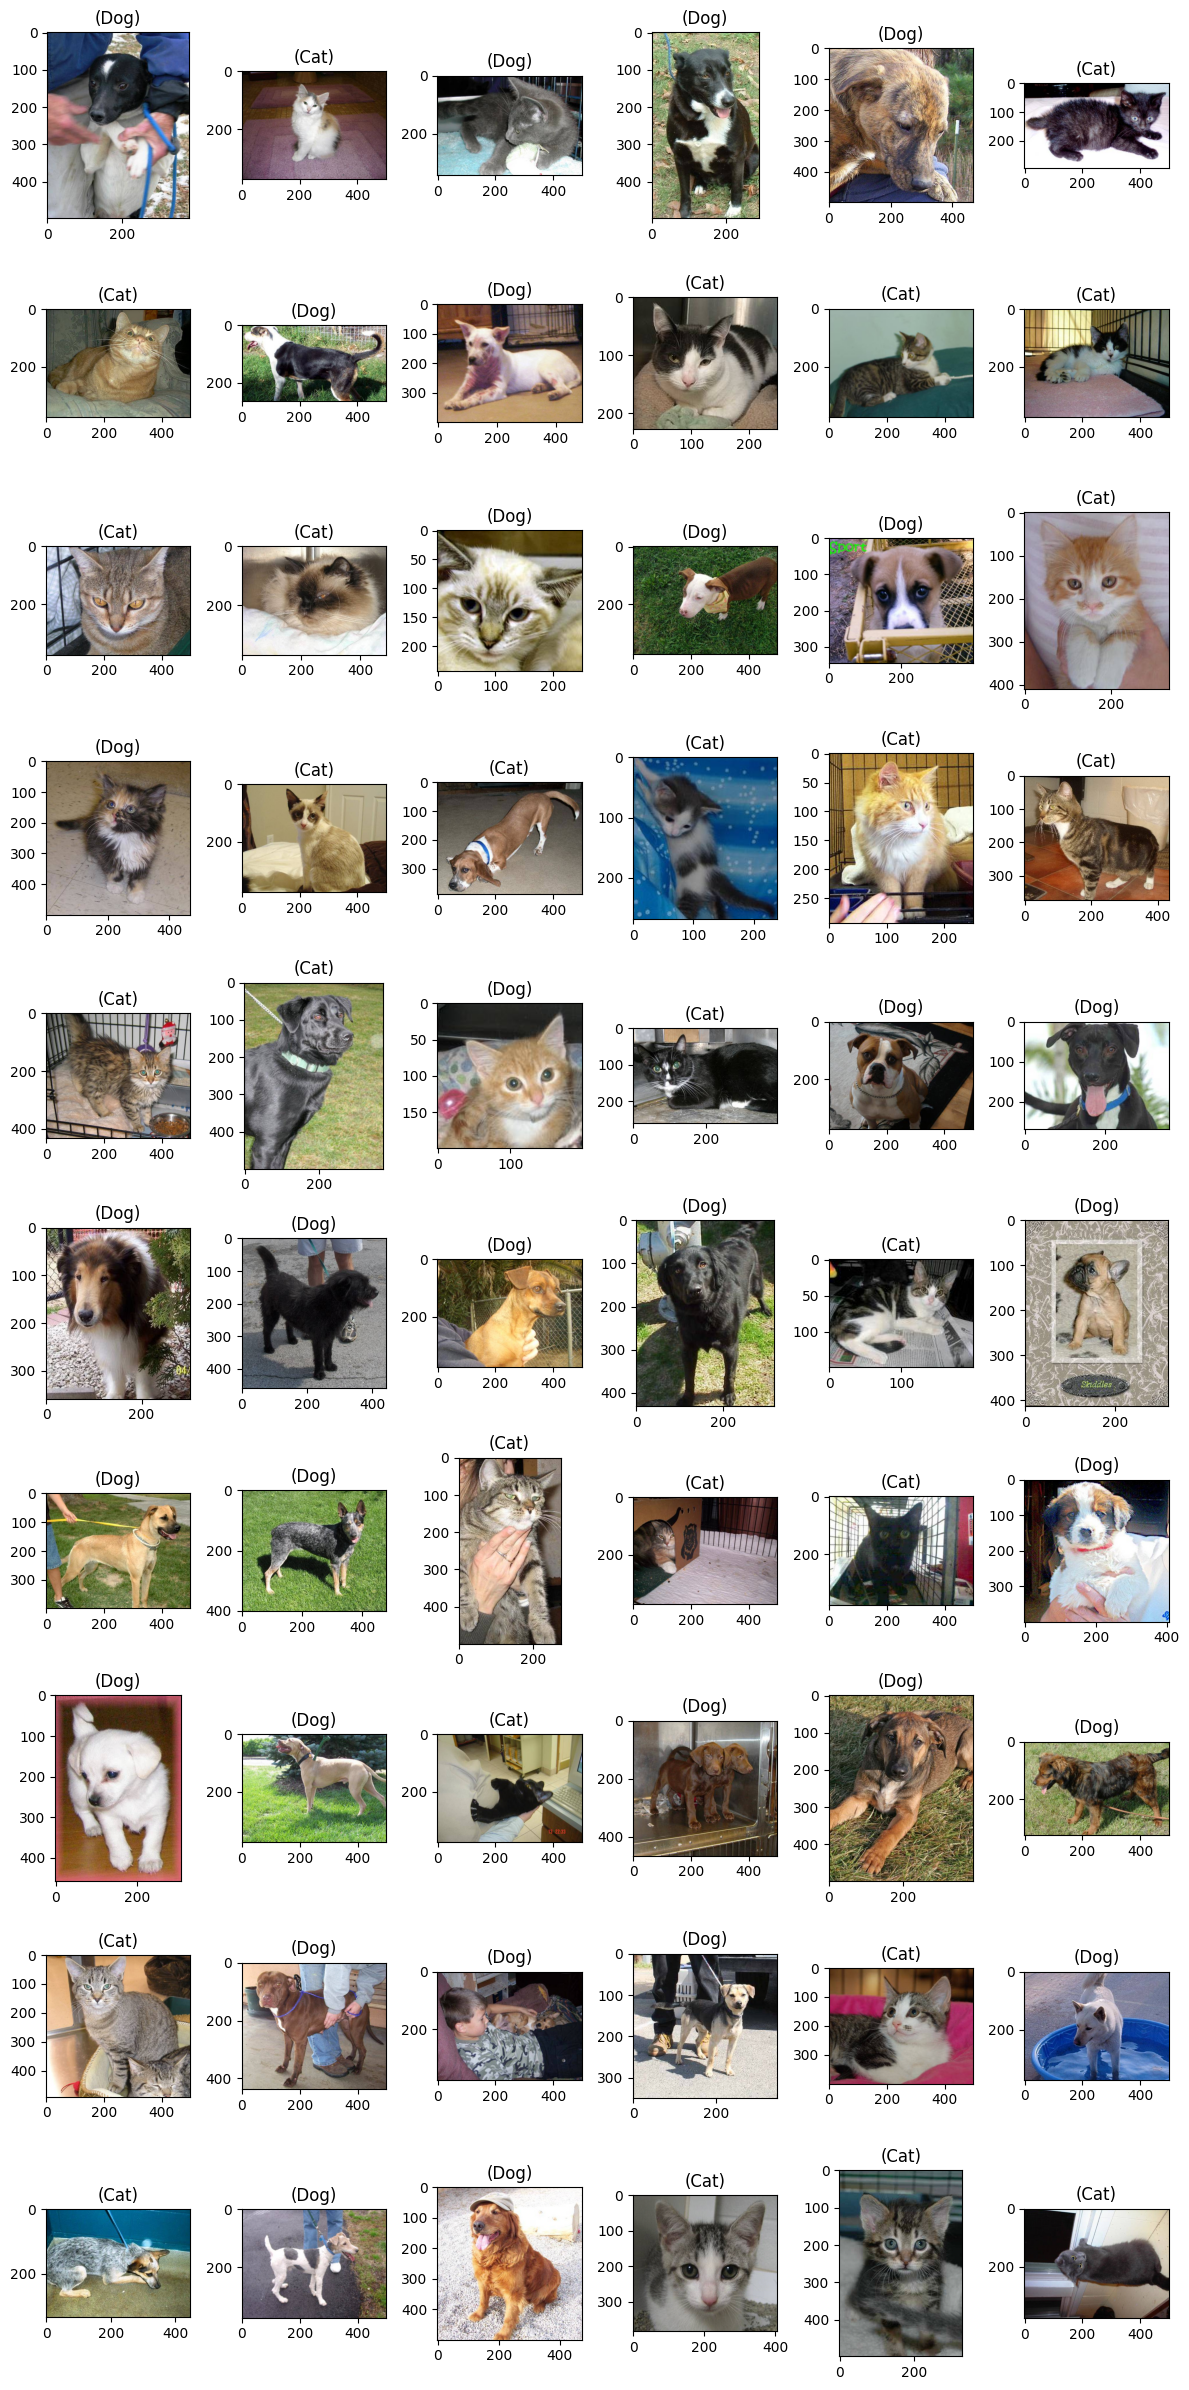

In [15]:
sample_test = submission_df.head(60)
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['id']
    category = row['label']
    img = plt.imread("D:\ziptest1\ziptest1\\" + filename + ".jpg")
    plt.subplot(10, 6, index+1)
    plt.imshow(img)
    if(category == 1):
        plt.title( '(' + "Dog"+ ')' )
    else:
        plt.title( '(' + "Cat"+ ')' )
plt.tight_layout()
plt.show()